# Set up and Install libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [3]:
# dataset path
data_set_source = "./datasets.csv"

# reading dataset and parsing date
df = pd.read_csv(data_set_source, parse_dates=["BILL_DATE"])

C:\Users\vithc\AppData\Local\Temp\ipykernel_4224\222467365.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_set_source, parse_dates=["BILL_DATE"])


# Cleaning Data

In [4]:
# convertion the QTY type from object to int64.
# we need to convert to string this column has mixed value between string and integer number.
# after convert to str we will delete "," comma in number.

df['QTY'] = df['QTY'].astype(str)
df['QTY'] = pd.to_numeric(df['QTY'].str.replace(',', ''), errors='coerce')

# Deleing white all space from string
df['CONSIGNEE_AMPHUR'] = df['CONSIGNEE_AMPHUR'].str.strip()
df['CONSIGNEE_PROVINCE'] = df['CONSIGNEE_PROVINCE'].str.strip()
df['CONSIGNEE_TAMBON'] = df['CONSIGNEE_TAMBON'].str.strip()
df['CONSIGNEE_ZIPCODE'] = df['CONSIGNEE_ZIPCODE'].str.strip()

df['ITEM_CODE'] = df['ITEM_CODE'].str.strip()
df['ITEM_DESCแสดงหน้าบิล'] = df['ITEM_DESCแสดงหน้าบิล'].str.strip()
df['ITEM_NAMEในระบบ'] = df['ITEM_NAMEในระบบ'].str.strip()

df['UNIT_NAME'] = df['UNIT_NAME'].str.strip()

df['DEST_CODE'] = df['DEST_CODE'].str.strip()
df['REG_Code'] = df['REG_Code'].str.strip()

In [5]:
df

,BILL_INDEX,BILL_DATE,CONSIGNEE_TAMBON,CONSIGNEE_AMPHUR,CONSIGNEE_PROVINCE,CONSIGNEE_ZIPCODE,ITEM_CODE,ITEM_DESCแสดงหน้าบิล,ITEM_NAMEในระบบ,QTY,UNIT_NAME,REG_Code,DEST_CODE
0,0,2024-03-01,ฟ้าฮ่าม,เมืองเชียงใหม่,เชียงใหม่,50000,10105.005,เอกสารโอทีขนส่ง+โอทียานยนต์+เบี้ยเลี้ยงนอกสถานที่,เอกสาร,1,ซอง,R20,D06
1,1,2024-03-01,ฟ้าฮ่าม,เมืองเชียงใหม่,เชียงใหม่,50000,10105.005,เอกสาร,เอกสาร,1,ซอง,R20,D06
2,2,2024-03-01,ฟ้าฮ่าม,เมืองเชียงใหม่,เชียงใหม่,50000,10105.005,เอกสาร,เอกสาร,1,ซอง,R20,D06
3,3,2024-03-01,ฟ้าฮ่าม,เมืองเชียงใหม่,เชียงใหม่,50000,10105.005,เอกสารใบสมัครงาน,เอกสาร,1,ซอง,R20,D06
4,4,2024-03-01,ป่าสัก,เมืองลำพูน,ลำพูน,51000,10601.229,สินค้าตกค้าง/กันกระแทก,สินค้าตกค้าง,14,ห่อ,R20,D33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184921,1184921,2024-03-31,ช้างคลาน,เมืองเชียงใหม่,เชียงใหม่,,99999.002,ของสด,ของสด,1,ฟญ,R22,D06
1184922,1184922,2024-03-31,หนองผึ้ง,สารภี,เชียงใหม่,50140,99999.002,หมุแผ่น,หมุแผ่น,1,กล่อง,R22,D06
1184923,1184923,2024-03-31,ช้างม่อย,เมืองเชียงใหม่,เชียงใหม่,50300,99999.002,ของสด,ของสด,2,ถัง,R22,D06
1184924,1184924,2024-03-31,NaN,NaN,เชียงใหม่,,99999.005,กาแฟสาร,กาแฟสาร,2,กระสอบ,R05,D06


In [6]:
thai_to_english = {
    'กรุงเทพมหานคร': 'Bangkok',
    'กระบี่': 'Krabi',
    'กาญจนบุรี': 'Kanchanaburi',
    'กาฬสินธุ์': 'Kalasin',
    'กำแพงเพชร': 'Kamphaeng Phet',
    'ขอนแก่น': 'Khon Kaen',
    'จันทบุรี': 'Chanthaburi',
    'ฉะเชิงเทรา': 'Chachoengsao',
    'ชลบุรี': 'Chonburi',
    'ชัยนาท': 'Chai Nat',
    'ชัยภูมิ': 'Chaiyaphum',
    'ชุมพร': 'Chumphon',
    'เชียงราย': 'Chiang Rai',
    'เชียงใหม่': 'Chiang Mai',
    'ตรัง': 'Trang',
    'ตราด': 'Trat',
    'ตาก': 'Tak',
    'นครนายก': 'Nakhon Nayok',
    'นครปฐม': 'Nakhon Pathom',
    'นครพนม': 'Nakhon Phanom',
    'นครราชสีมา': 'Nakhon Ratchasima',
    'นครศรีธรรมราช': 'Nakhon Si Thammarat',
    'นครสวรรค์': 'Nakhon Sawan',
    'นนทบุรี': 'Nonthaburi',
    'นราธิวาส': 'Narathiwat',
    'น่าน': 'Nan',
    'บึงกาฬ': 'Bueng Kan',
    'บุรีรัมย์': 'Buri Ram',
    'ปทุมธานี': 'Pathum Thani',
    'ประจวบคีรีขันธ์': 'Prachuap Khiri Khan',
    'ปราจีนบุรี': 'Prachin Buri',
    'ปัตตานี': 'Pattani',
    'พระนครศรีอยุธยา': 'Phra Nakhon Si Ayutthaya',
    'พะเยา': 'Phayao',
    'พังงา': 'Phangnga',
    'พัทลุง': 'Phatthalung',
    'พิจิตร': 'Phichit',
    'พิษณุโลก': 'Phitsanulok',
    'เพชรบุรี': 'Phetchaburi',
    'เพชรบูรณ์': 'Phetchabun',
    'แพร่': 'Phrae',
    'ภูเก็ต': 'Phuket',
    'มหาสารคาม': 'Maha Sarakham',
    'มุกดาหาร': 'Mukdahan',
    'แม่ฮ่องสอน': 'Mae Hong Son',
    'ยโสธร': 'Yasothon',
    'ยะลา': 'Yala',
    'ร้อยเอ็ด': 'Roi Et',
    'ระนอง': 'Ranong',
    'ระยอง': 'Rayong',
    'ราชบุรี': 'Ratchaburi',
    'ลพบุรี': 'Lopburi',
    'ลำปาง': 'Lampang',
    'ลำพูน': 'Lamphun',
    'เลย': 'Loei',
    'ศรีสะเกษ': 'Si Sa Ket',
    'สกลนคร': 'Sakon Nakhon',
    'สงขลา': 'Songkhla',
    'สตูล': 'Satun',
    'สมุทรปราการ': 'Samut Prakan',
    'สมุทรสงคราม': 'Samut Songkhram',
    'สมุทรสาคร': 'Samut Sakhon',
    'สระแก้ว': 'Sa Kaeo',
    'สระบุรี': 'Saraburi',
    'สิงห์บุรี': 'Sing Buri',
    'สุโขทัย': 'Sukhothai',
    'สุพรรณบุรี': 'Suphanburi',
    'สุราษฎร์ธานี': 'Surat Thani',
    'สุรินทร์': 'Surin',
    'หนองคาย': 'Nong Khai',
    'หนองบัวลำภู': 'Nong Bua Lam Phu',
    'อ่างทอง': 'Ang Thong',
    'อำนาจเจริญ': 'Amnat Charoen',
    'อุดรธานี': 'Udon Thani',
    'อุตรดิตถ์': 'Uttaradit',
    'อุทัยธานี': 'Uthai Thani',
    'อุบลราชธานี': 'Ubon Ratchathani'
}

df['CONSIGNEE_PROVINCE'] = df['CONSIGNEE_PROVINCE'].replace(thai_to_english)

In [7]:
# df[df['CONSIGNEE_PROVINCE'].isnull()]
df.isnull().sum()

BILL_INDEX                   0
BILL_DATE                    0
CONSIGNEE_TAMBON        328420
CONSIGNEE_AMPHUR        210453
CONSIGNEE_PROVINCE           2
CONSIGNEE_ZIPCODE            0
ITEM_CODE                    0
ITEM_DESCแสดงหน้าบิล         0
ITEM_NAMEในระบบ              0
QTY                          0
UNIT_NAME                    0
REG_Code                     0
DEST_CODE                    1
dtype: int64

In [8]:
df.at[332626, 'CONSIGNEE_PROVINCE'] = 'Chiang Mai'
df.at[671232, 'CONSIGNEE_PROVINCE'] = 'Chiang Mai'

In [9]:
df[df['CONSIGNEE_PROVINCE'].isnull()]

,BILL_INDEX,BILL_DATE,CONSIGNEE_TAMBON,CONSIGNEE_AMPHUR,CONSIGNEE_PROVINCE,CONSIGNEE_ZIPCODE,ITEM_CODE,ITEM_DESCแสดงหน้าบิล,ITEM_NAMEในระบบ,QTY,UNIT_NAME,REG_Code,DEST_CODE


# Extract Data

In [10]:
columns = [
	'BILL_DATE', 'ITEM_DESCแสดงหน้าบิล',
	'CONSIGNEE_PROVINCE',
	'ITEM_NAMEในระบบ', 'QTY', 'UNIT_NAME',
	'REG_Code', 'DEST_CODE'
]
df = df[columns]

In [11]:
df = df[(df['ITEM_NAMEในระบบ'] != 'ค่าขนส่งส่วนเพิ่ม') & (df['ITEM_NAMEในระบบ'] != 'สินค้าตกค้าง')]
df

,BILL_DATE,ITEM_DESCแสดงหน้าบิล,CONSIGNEE_PROVINCE,ITEM_NAMEในระบบ,QTY,UNIT_NAME,REG_Code,DEST_CODE
0,2024-03-01,เอกสารโอทีขนส่ง+โอทียานยนต์+เบี้ยเลี้ยงนอกสถานที่,Chiang Mai,เอกสาร,1,ซอง,R20,D06
1,2024-03-01,เอกสาร,Chiang Mai,เอกสาร,1,ซอง,R20,D06
2,2024-03-01,เอกสาร,Chiang Mai,เอกสาร,1,ซอง,R20,D06
3,2024-03-01,เอกสารใบสมัครงาน,Chiang Mai,เอกสาร,1,ซอง,R20,D06
5,2024-03-01,เหล็กข้างรถเทรเลอร์,Lamphun,เหล็กข้างรถเทรเลอร์,20,ท่อน,R20,D33
...,...,...,...,...,...,...,...,...
1184921,2024-03-31,ของสด,Chiang Mai,ของสด,1,ฟญ,R22,D06
1184922,2024-03-31,หมุแผ่น,Chiang Mai,หมุแผ่น,1,กล่อง,R22,D06
1184923,2024-03-31,ของสด,Chiang Mai,ของสด,2,ถัง,R22,D06
1184924,2024-03-31,กาแฟสาร,Chiang Mai,กาแฟสาร,2,กระสอบ,R05,D06


# What is the best month of demand

In [12]:
df['Month'] = df['BILL_DATE'].dt.month
df_sum = df.groupby("Month")['QTY'].sum().reset_index()
month_plot = [m for m,ss in df.groupby('Month')]
df_sum

,Month,QTY
0,1,1049433
1,2,1070180
2,3,1248687
3,4,1141836
4,5,1216476
5,6,1088662


(0.0, 1400000.0)

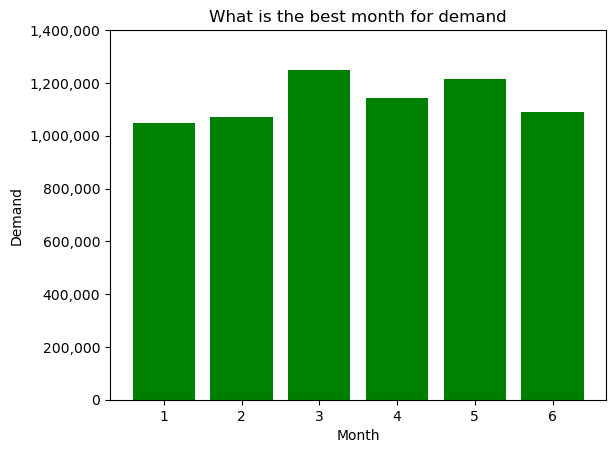

In [13]:
plt.bar(month_plot, df_sum['QTY'], color='green')
plt.gca().yaxis.set_major_formatter(mtick.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("What is the best month for demand")
plt.xlabel("Month")
plt.ylabel("Demand")
plt.ylim(0, 1400000)
# plt.figure(figsize=(15,12))

# Top 10 Cities/Provinces with the highest demand

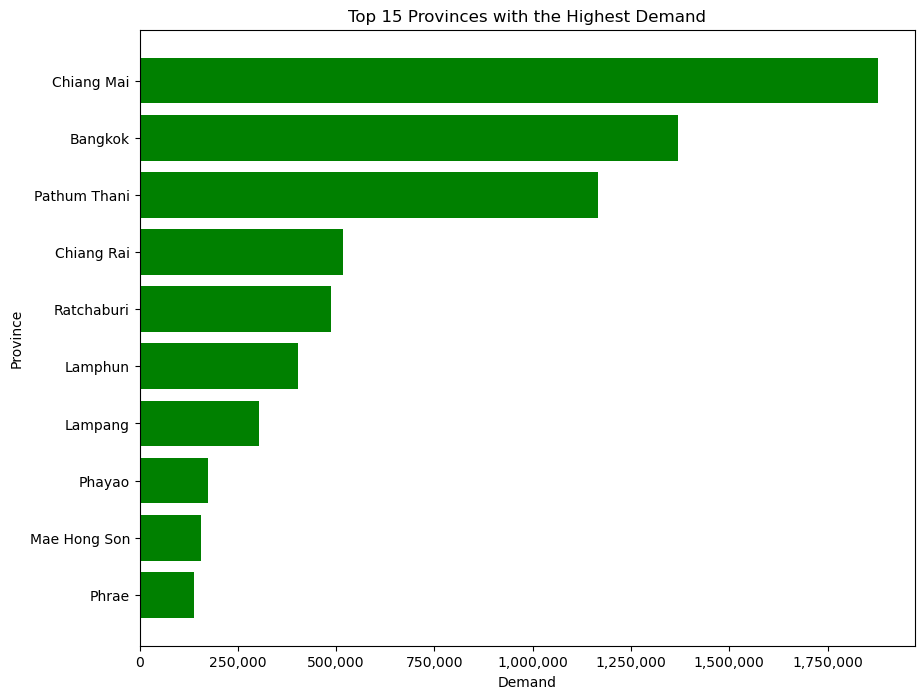

In [14]:
city_sum = df.groupby("CONSIGNEE_PROVINCE")['QTY'].sum().reset_index()
city_sum = city_sum.sort_values("QTY", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(city_sum['CONSIGNEE_PROVINCE'][:10], city_sum['QTY'][:10], color='green')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Top 15 Provinces with the Highest Demand")
plt.xlabel("Demand")
plt.ylabel("Province")
plt.gca().invert_yaxis()
plt.show()

# Top Products by Province

In [15]:
province_product_sum = df.groupby(['CONSIGNEE_PROVINCE', 'ITEM_NAMEในระบบ'])['QTY'].sum().reset_index()
province_product_sum = province_product_sum.sort_values(["QTY"], ascending=False)
top_products_by_province = province_product_sum.groupby('CONSIGNEE_PROVINCE').first().reset_index()

In [16]:
top_products_by_province[top_products_by_province['ITEM_NAMEในระบบ'] != 'สินค้าทั่วไป']

,CONSIGNEE_PROVINCE,ITEM_NAMEในระบบ,QTY
2,Bangkok,กระเทียมกลีบ 20x50x20 cm / 10 kg,98603
7,Chaiyaphum,ตะกร้าเปล่าหูเหล็ก 36x54x33 cm ลงเชียงใหม่,333
9,Chiang Mai,ตะกร้าเปล่าหูเหล็ก 36x54x33 cm ลงกองลอย,160861
10,Chiang Rai,ตะกร้าหูเหล็ก(36*56*35 cm),42968
11,Chonburi,ไม้เสียบ ( 36*36*35 cm) 20kg (น่าน),657
13,Kalasin,กล่องบริษัท ไซส์ S,79
15,Kanchanaburi,พริกยักษ์ 29x 42x 37 cm / 10 kg,1047
16,Khon Kaen,ยางเก๋ง,1466
18,Lampang,ผ้า,12829
19,Lamphun,ผ้า,14142


# Correlation between provinces

# Predict Demand with multi products/items

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet

In [95]:
def demand_forecasting(train_data, periods: int = 1) -> tuple[Prophet ,pd.DataFrame]:
	try:
		# range of predict
		model = Prophet(interval_width=0.65)
		model.fit(train_data)

		future = model.make_future_dataframe(periods=periods)
		forecast = model.predict(future)
		# model.plot_components(forecast)
		# model.plot(forecast)
		return model, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
		# return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-periods:]

	except Exception as error:
		return model, f"Error: {error}"

In [59]:
def evaluate_model_accuracy(grouped_data, test_size: float = 0.2):
	try:
		train_data, test_data = train_test_split(grouped_data, test_size=test_size, shuffle=False)
		forecast = demand_forecasting(train_data, periods=len(test_data))

		mae = mean_absolute_error(test_data['y'].values, forecast['yhat'].values)
		mse = mean_squared_error(test_data['y'].values, forecast['yhat'].values)
		rmse = np.sqrt(mse)

		return {
			'MAE': mae,
			'MSE': mse,
			'RMSE': rmse
		}
	except Exception as error:
		return f"Error: {error}"

In [60]:

def extract_data_by_item_name_and_group_by(data: pd.DataFrame, datetime_column: str, column: str, filter_value: str, y: str) -> pd.DataFrame:
	filtered_df = data[data[column] == filter_value]
	grouped_df = filtered_df.groupby([datetime_column])[y].sum().reset_index()
	grouped_df = grouped_df.rename(columns={datetime_column: 'ds', y: 'y'})
	return grouped_df

In [49]:
# to store forecasting result
item = 'เอกสาร'
forecasting = {}
accuracy_metrics = {}
demand_items = df['ITEM_NAMEในระบบ'].unique()

In [96]:
grouped_data = extract_data_by_item_name_and_group_by(data=df, datetime_column="BILL_DATE", column="ITEM_NAMEในระบบ", filter_value=item, y="QTY")
model, predicted_data = demand_forecasting(grouped_data, periods=1)
# grouped_data.max()
# grouped_data.set_index('ds').plot(title='Document', grid=True, figsize=(20, 10))
# # Evaluate model accuracy
# accuracy = evaluate_model_accuracy(grouped_data, test_size=0.2)
# accuracy_metrics[item] = accuracy

# # Save the forecast result (using the entire dataset for final forecast)

18:34:27 - cmdstanpy - INFO - Chain [1] start processing
18:34:27 - cmdstanpy - INFO - Chain [1] done processing


In [97]:
df_merged = pd.merge(grouped_data, predicted_data, on='ds')
df_merged

,ds,y,yhat,yhat_lower,yhat_upper
0,2024-01-02,12,26.480509,18.185587,35.050297
1,2024-01-03,23,21.749976,13.930148,30.241279
2,2024-01-04,15,26.677323,17.763340,35.075341
3,2024-01-05,28,28.229610,19.337978,36.330024
4,2024-01-06,9,19.605463,11.425234,28.458558
...,...,...,...,...,...
167,2024-06-26,22,17.705510,8.787731,25.745772
168,2024-06-27,20,22.632857,14.462720,30.798144
169,2024-06-28,30,24.185145,14.865595,31.481140
170,2024-06-29,21,15.560997,7.931539,23.302831


In [74]:
grouped_data

,ds,y
0,2024-01-02,12
1,2024-01-03,23
2,2024-01-04,15
3,2024-01-05,28
4,2024-01-06,9
...,...,...
167,2024-06-26,22
168,2024-06-27,20
169,2024-06-28,30
170,2024-06-29,21


# Cross Validation

In [100]:
from prophet.diagnostics import cross_validation, performance_metrics

In [98]:
df_cv = cross_validation(model, initial='10 days', period='7 days', horizon='7 days')

  0%|          | 0/24 [00:00<?, ?it/s]18:34:37 - cmdstanpy - INFO - Chain [1] start processing
18:34:37 - cmdstanpy - INFO - Chain [1] done processing
  4%|▍         | 1/24 [00:00<00:07,  3.00it/s]18:34:37 - cmdstanpy - INFO - Chain [1] start processing
18:34:37 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 2/24 [00:00<00:06,  3.43it/s]18:34:37 - cmdstanpy - INFO - Chain [1] start processing
18:34:37 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 3/24 [00:00<00:06,  3.05it/s]18:34:38 - cmdstanpy - INFO - Chain [1] start processing
18:34:38 - cmdstanpy - INFO - Chain [1] done processing
 17%|█▋        | 4/24 [00:01<00:06,  3.05it/s]18:34:38 - cmdstanpy - INFO - Chain [1] start processing
18:34:38 - cmdstanpy - INFO - Chain [1] done processing
 21%|██        | 5/24 [00:01<00:06,  3.04it/s]18:34:38 - cmdstanpy - INFO - Chain [1] start processing
18:34:38 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 6/24 [00:01<00:06,  2.98it/s]18:34:39

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-01-15,36.595203,33.344761,40.272598,24,2024-01-14
1,2024-01-16,35.881074,32.560480,39.016653,22,2024-01-14
2,2024-01-17,36.882386,33.468441,40.080863,17,2024-01-14
3,2024-01-18,36.383866,33.038334,39.801878,25,2024-01-14
4,2024-01-19,53.382343,49.808885,56.446410,23,2024-01-14
...,...,...,...,...,...,...
155,2024-06-26,18.041568,9.228038,25.411621,22,2024-06-23
156,2024-06-27,23.279034,14.893378,31.100526,20,2024-06-23
157,2024-06-28,24.469455,15.350909,32.739345,30,2024-06-23
158,2024-06-29,15.855470,7.524880,24.016246,21,2024-06-23


In [99]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-01-15,36.595203,33.344761,40.272598,24,2024-01-14
1,2024-01-16,35.881074,32.560480,39.016653,22,2024-01-14
2,2024-01-17,36.882386,33.468441,40.080863,17,2024-01-14
3,2024-01-18,36.383866,33.038334,39.801878,25,2024-01-14
4,2024-01-19,53.382343,49.808885,56.446410,23,2024-01-14


In [101]:
df_p = performance_metrics(df_cv)

In [102]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,160.053542,12.651227,10.315991,0.725016,0.398489,0.413880,0.500000
1,2 days,215.253888,14.671533,11.656178,1.576731,0.461044,0.447285,0.416667
2,3 days,75.808428,8.706804,6.839121,0.446557,0.250776,0.346718,0.750000
3,4 days,113.917322,10.673206,7.467372,0.312252,0.245213,0.277373,0.666667
4,5 days,100.413313,10.020644,6.900600,0.326808,0.175195,0.252847,0.695652
5,6 days,49.120018,7.008567,4.966548,0.320280,0.217327,0.275094,0.869565
6,7 days,6.395272,2.528887,2.129189,0.937191,0.622283,0.806572,1.000000
